<div style="background:#96D225; padding:0.5rem; font-size:1.5rem">
Author: Ikshit Gupta
    </div>

<div style="background:#96DDD5; padding:1rem; font-size:1.5rem">
 
Introduction
</div>

<div style="background:#91f2f5; padding:1rem; font-size:1.5rem">
 
Songs on Spotify span several genres. There are just 15 genres in the data I'm planning to use for this project The objective here is to analyze all the genres with different features and check how they relate to genres.
</div>

## <div style="background:#96DDD5; padding:1rem">Data Loading</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plt.rcParams['figure.figsize'] = [15,8]
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../input/dataset-of-songs-in-spotify/genres_v2.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
df.shape

(42305, 22)

In [4]:
df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [5]:
df = df.drop(['type', 'uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title'], 1)

In [6]:
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,42305.0,0.639364,0.156617,0.065100,0.52400,0.64600,0.766,0.988
energy,42305.0,0.762516,0.183823,0.000243,0.63200,0.80300,0.923,1.000
key,42305.0,5.370240,3.666145,0.000000,1.00000,6.00000,9.000,11.000
loudness,42305.0,-6.465442,2.941165,-33.357000,-8.16100,-6.23400,-4.513,3.148
mode,42305.0,0.549462,0.497553,0.000000,0.00000,1.00000,1.000,1.000
speechiness,42305.0,0.136561,0.126168,0.022700,0.04910,0.07550,0.193,0.946
acousticness,42305.0,0.096160,0.170827,0.000001,0.00173,0.01640,0.107,0.988
instrumentalness,42305.0,0.283048,0.370791,0.000000,0.00000,0.00594,0.722,0.989
liveness,42305.0,0.214079,0.175576,0.010700,0.09960,0.13500,0.294,0.988
valence,42305.0,0.357101,0.233200,0.018700,0.16100,0.32200,0.522,0.988


## <div style="background:#96DDD5; padding:1rem">Data Distribution</div>

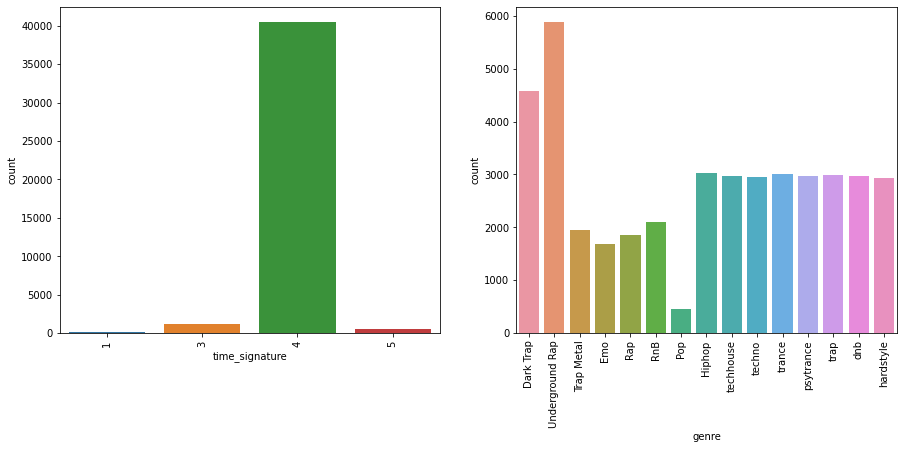

In [7]:
categorical_cols = ['time_signature', 'genre']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)

plt.show()

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Data contains only a few instances of ‘time signature’ 1, 3, and 5. Most instances are 4 ‘time signature’.
- Underground Rap has the maximum number, and Pop has the minimum number of instances.
</div>

In [8]:
numerical_cols = df.select_dtypes('number').drop('time_signature', 1).columns.to_list()

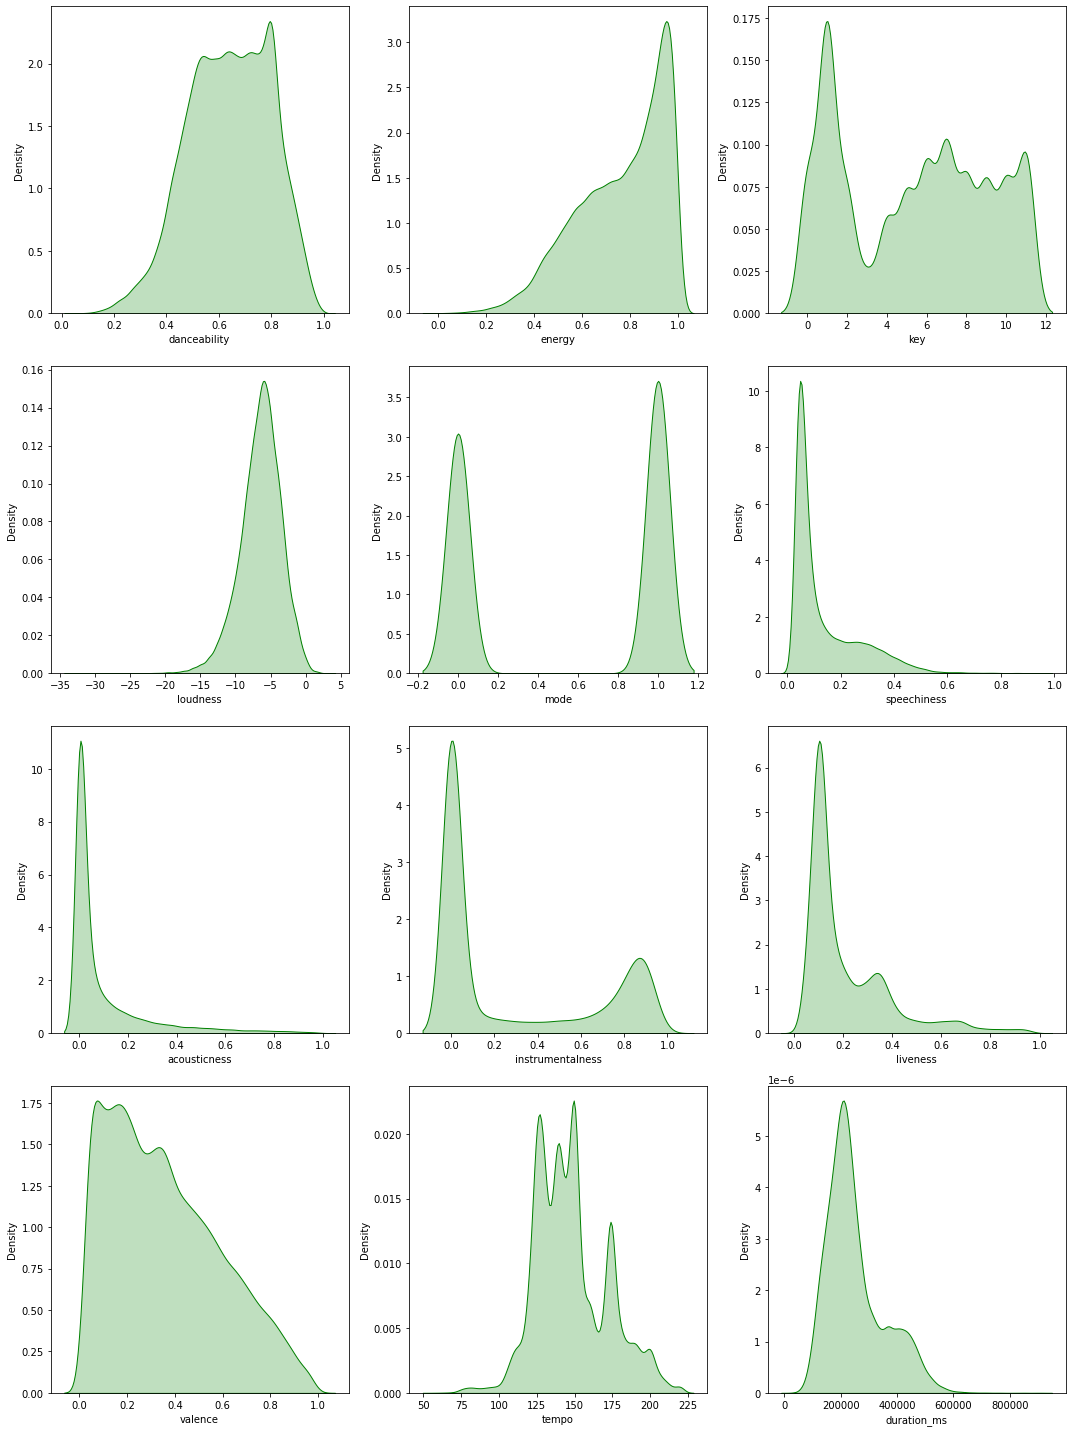

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.kdeplot(data=df, x=col, fill=True, color='green')

plt.tight_layout()
plt.show()

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Danceability follows an approximately normal distribution.
- Energy feature is negatively skewed.
- The loudness feature is normally distributed with a few outliers.
- The number of instances with mode 1 is greater than mode 0.
- The Speechiness feature is positively skewed, meaning the 'speechiness' feature's mean is greater than the median.
- 'Acousticness', 'instrumentalness', 'liveness', and valence features are all positively skewed.
- The "temp" and "duration_ms" features seem to have a normal distribution.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Danceability</div>

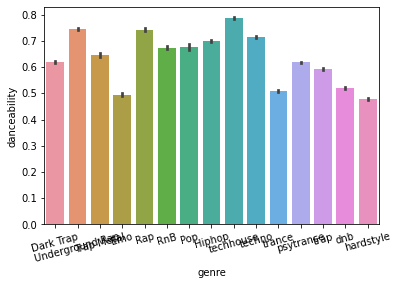

In [10]:
sns.barplot(data=df, x='genre', y='danceability')
plt.xticks(rotation=15)
plt.show()

In [11]:
def plot_genre_horizontal_bar(col, title=None):
    data = df.groupby('genre')[col].mean().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    data.plot.barh(color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 18, 'color': '#de5d83'})
    plt.show()

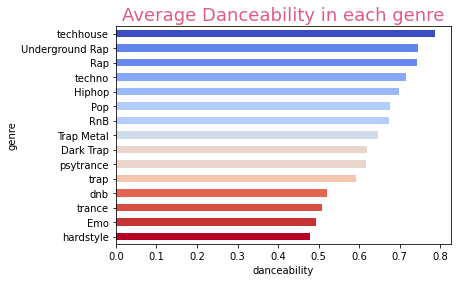

In [12]:
plot_genre_horizontal_bar('danceability',
                          title="Average Danceability in each genre")

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Songs in the genre 'techhouse' have the maximum average danceability, followed by underground Rap. And hardstyle songs have minimum danceability.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Energy</div>

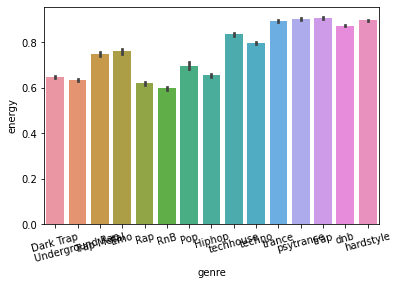

In [13]:
sns.barplot(data=df, x='genre', y='energy')
plt.xticks(rotation=15)
plt.show()

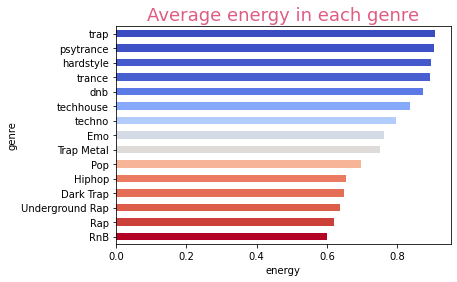

In [14]:
plot_genre_horizontal_bar('energy', title="Average energy in each genre")

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Songs in genre "trap", "psytrance", "hardstyle", "trance", and "dnb" have the highest energy, and RnB, Rap, and Underground Rap lowest.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Loudness</div>

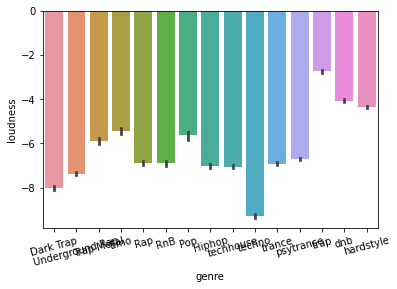

In [15]:
sns.barplot(data=df, x='genre', y='loudness')
plt.xticks(rotation=15)
plt.show()

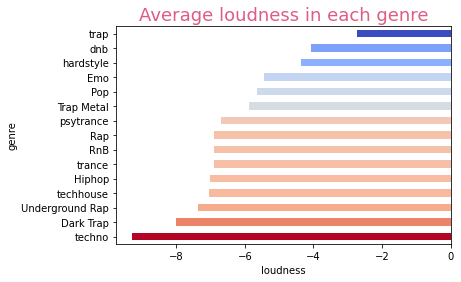

In [16]:
plot_genre_horizontal_bar('loudness', title="Average loudness in each genre")

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Songs in all genres have loudness scores in negatives. "Trap" genre has the highest "loudness", and "techno" genre lowest.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Speechiness</div>

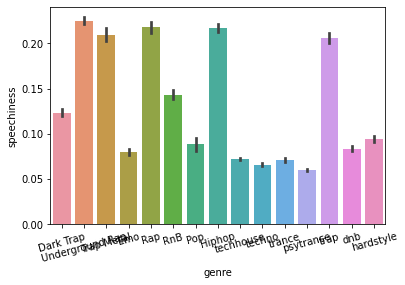

In [17]:
sns.barplot(data=df, x='genre', y='speechiness')
plt.xticks(rotation=15)
plt.show()

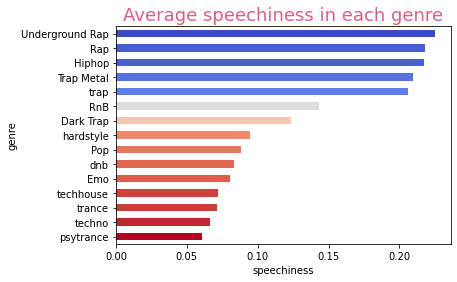

In [18]:
plot_genre_horizontal_bar('speechiness',
                          title='Average speechiness in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Underground Rap, Rap, and Hiphop are the top-3 genres for “speechiness”, and trance, techno, and psytrance are the lowest.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Acousticness</div>

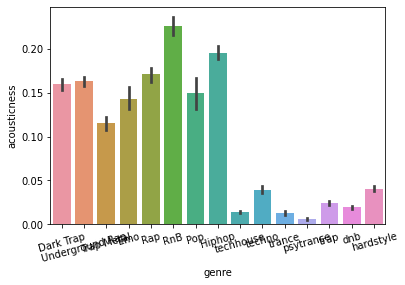

In [19]:
sns.barplot(data=df, x='genre', y='acousticness')
plt.xticks(rotation=15)
plt.show()

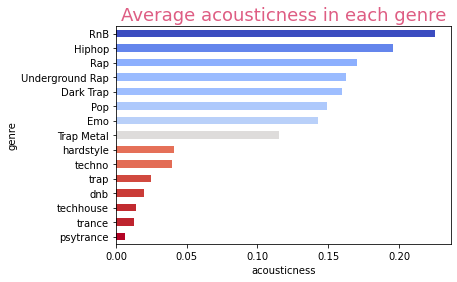

In [20]:
plot_genre_horizontal_bar('acousticness',
                          title='Average acousticness in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Songs in genre 'RnB' have the maximum acousticness score and followed by Hiphop and Rap.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Instrumentalness</div>

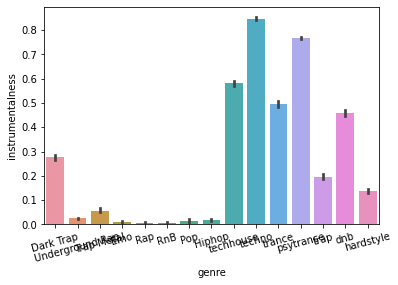

In [21]:
sns.barplot(data=df, x='genre', y='instrumentalness')
plt.xticks(rotation=15)
plt.show()

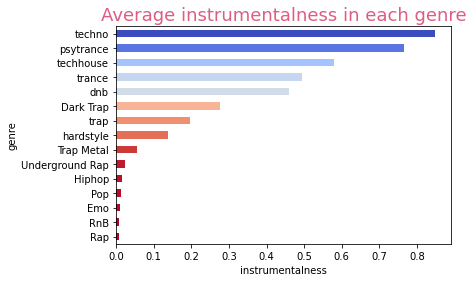

In [22]:
plot_genre_horizontal_bar('instrumentalness',
                          title='Average instrumentalness in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- The 'techno' genre songs have the maximum instrumentalness score, followed by 'psytrance' genre.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Liveness</div>

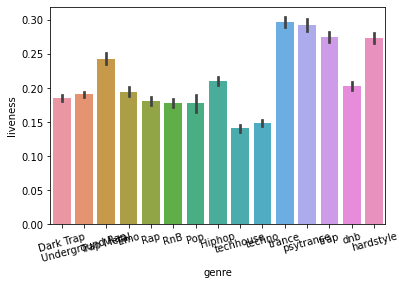

In [23]:
sns.barplot(data=df, x='genre', y='liveness')
plt.xticks(rotation=15)
plt.show()

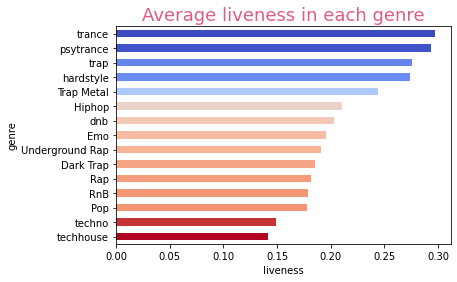

In [24]:
plot_genre_horizontal_bar('liveness', title='Average liveness in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- "Trance" and "psytrance" are the top genres with liveness scores.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Valence</div>

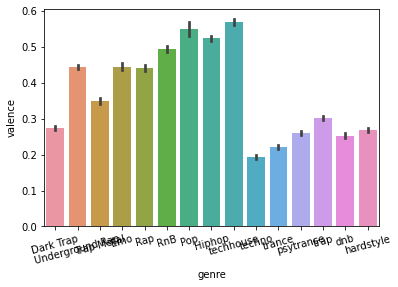

In [25]:
sns.barplot(data=df, x='genre', y='valence')
plt.xticks(rotation=15)
plt.show()

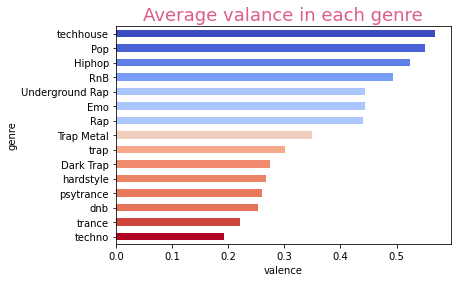

In [26]:
plot_genre_horizontal_bar('valence', title='Average valance in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- The valence bis maximum for 'techhouse' genre followed by Pop and minimum for 'techno' and 'trance'.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Tempo</div>

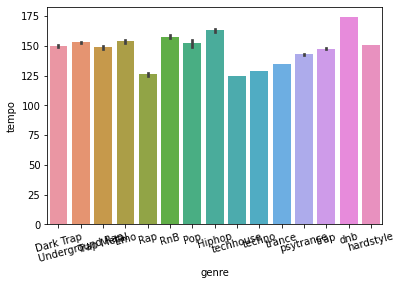

In [27]:
sns.barplot(data=df, x='genre', y='tempo')
plt.xticks(rotation=15)
plt.show()

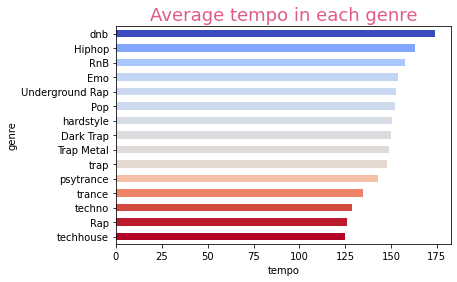

In [28]:
plot_genre_horizontal_bar('tempo', title='Average tempo in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Tempo score the highest for 'dnb' genre followed by 'Hiphop' genre. And 'techhouse' has the lowest.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Time Duration</div>

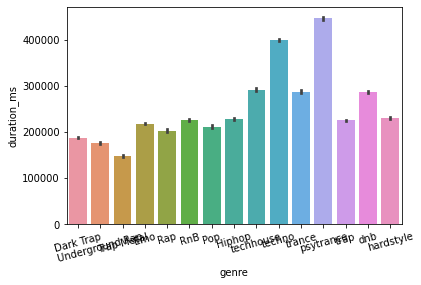

In [29]:
sns.barplot(data=df, x='genre', y='duration_ms')
plt.xticks(rotation=15)
plt.show()

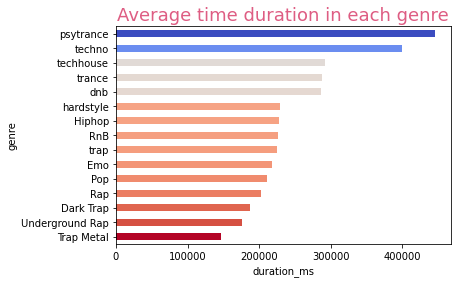

In [30]:
plot_genre_horizontal_bar('duration_ms',
                          title='Average time duration in each genre')

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Songs in genres 'psytrance' and 'techno' are the longest than all other genres.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Mode</div>

In [31]:
data = (df
        .groupby(['genre', 'mode'])['mode']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

mode,0,1
genre,,
Dark Trap,2122,2456
Emo,528,1152
Hiphop,1430,1598
Pop,208,253
Rap,883,965
RnB,982,1117
Trap Metal,552,1404
Underground Rap,2270,3605
dnb,1643,1323


<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- In both modes, Underground Rap has the maximum number of instances.
</div>

## <div style="background:#96DDD5; padding:1rem">Song Genre and Time Signature</div>

In [32]:
data = (df
        .groupby(['genre', 'time_signature'])['time_signature']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

time_signature,1,3,4,5
genre,,,,
Dark Trap,37.000000,181.000000,4245.000000,115.000000
Emo,8.000000,92.000000,1567.000000,13.000000
Hiphop,23.000000,64.000000,2882.000000,59.000000
Pop,2.000000,6.000000,448.000000,5.000000
Rap,7.000000,46.000000,1754.000000,41.000000
RnB,15.000000,90.000000,1941.000000,53.000000
Trap Metal,8.000000,115.000000,1785.000000,48.000000
Underground Rap,23.000000,159.000000,5583.000000,110.000000
dnb,1.000000,3.000000,2961.000000,1.000000


<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- Except for 'time-signature' 4, all have the maximum number of instances in the 'Dark Trap' genre. Underground Rap has the maximum number of instances in the 'time-signature' 4.
</div>

## <div style="background:#96DDD5; padding:1rem">Correlation</div>

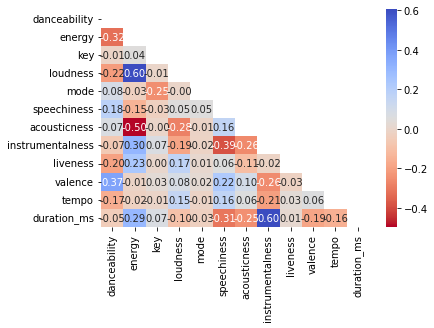

In [33]:
corr_mat = df[numerical_cols].corr()

sns.heatmap(corr_mat,
            annot=True,
            fmt='.2f',
            cmap=plt.cm.coolwarm_r,
            mask=np.triu(corr_mat, k=0))
plt.show()

<div style="background:#fae7b5; padding:1.5rem; font-size:1.5rem">
 
- 'Acousticness' has positive correlation with 'tempo' and 'valence'.
- 'Energy' has positive correlation with 'loudness', 'instrumentalness', 'liveness', and 'time duration'.
- 'Danceability' has positive correlation with 'valence' feature.

</div>